# Introduction to Data Analysis and Machine Learning
*by Jonathan Frawley*

You are all very welcome!


Please sign in: https://bit.ly/2VTTtK2

# Who am I?
 - Intro about me
 - 10 years of software development experience in industry (Python and Scala mostly)
 - Part-time PhD in Computer Science in Deep Learning
 - Research Software Engineer in Advanced Research Computing
 - Colleagues from ARC, Alison Clarke and Marion Weinzierl, on hand to help

# Icebreaker
 - Please say "Yes" on "Manage Participants" window 

 - Please put your hand up

 - Say briefly why you joined this course today in chat

# Basic information about today
 - Mixture of lecturing and hands on exercises. 
 - All materials are open source, including slides.
 - These will remain available after the course finishes, so don't worry if you do not get through all exercises.
 - If you notice issues, please contact me directly (jonathan.frawley@durham.ac.uk) or raise an issue on the GitHub repository: <https://bit.ly/2RZn5og>

# Outline of Day
 1. General introduction, NumPy, Matplotlib and basic probability theory
 2. Pandas and data analysis
 3. PyTorch and Deep Learning introduction

# Google Colab
<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*8N7xbq6ahVvWkEq_S5EhMA.jpeg" alt="Google Colab logo" width="300"/>
 
 - Google Colab is a free system for running Python notebooks in the cloud
 - It supports a wide variety of Python libraries
 - Free access to state-of-the-art GPU hardware
 - We will use Google Colab for all exercises
 - Links and instructions are included on the main page
 - If you get the following: **Warning: This notebook was not authored by Google.**, click **Run anyway**
 - Test: <https://bit.ly/2KqGiet>

# Slides are all runnable as Colab notebooks
<https://bit.ly/2VNQR0z>

# Introduction to NumPy, Matplotlib and Probability

## Introduction to NumPy

Importing:

In [1]:
import numpy as np

## NumPy Basics
NumPy is a library used extensively by researchers with Python. It provides high-performance data structures and algorithms for common numerical operations.

We will go over some of the basics which will be used throughout this course.

First, let us create a random array of 1000 integers between 0 and 9:

In [2]:
arr = np.random.randint(0, high=10, size=1000) # Note (low is inclusive and high is exclusive)
arr.shape # The size of dimensions

(1000,)

In [3]:
arr[0:10]

array([7, 9, 4, 4, 4, 5, 6, 5, 5, 1])

Generating data in a normal distribution:

In [4]:
mean = 10
std = 5
n = np.random.normal(mean, std, 10000)
n.mean(), n.std()

(10.007162917722406, 4.992063301472287)

Get mean of array:

In [5]:
arr.mean()

4.479

Get standard deviation of array:

In [6]:
arr.std()

2.835764270880074

Find the number of entries in an array within a range:

In [7]:
np.sum(((arr > 4) & (arr < 8)))

309

# Introduction to Matplotlib

We are going to look at plotting of data using a library called [Matplotlib](https://matplotlib.org/). It is widely used, very flexible and is capable of producing publication-quality plots.

## Basic Example

We first need to import our dependencies:

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Next, we generate some sample data for plotting, based on a sin wave:

In [9]:
# Data for plotting
x_data = np.arange(0.0, 2.0, 0.01)
y_data = 1 + np.sin(2 * np.pi * x_data)

Next, we setup the plots. You can setup multiple subplots but here we just setup a single plot. Then we set the labels and title of the plot. Finally, we show it:

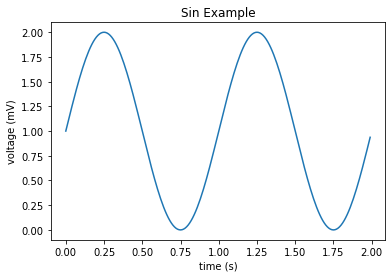

In [10]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Sin Example')
plt.show()

Let's try and change the labels, add a grid and change the colour:

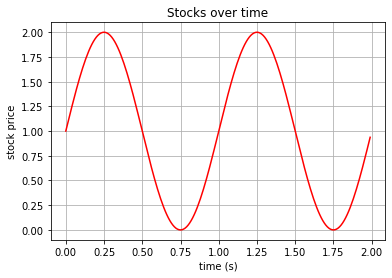

In [11]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, color='red')
ax.set(xlabel='time (s)', ylabel='stock price',
       title='Stocks over time')
ax.grid()
plt.show()

## Multiple subplots
Here we show an example of how to add multiple subplots:

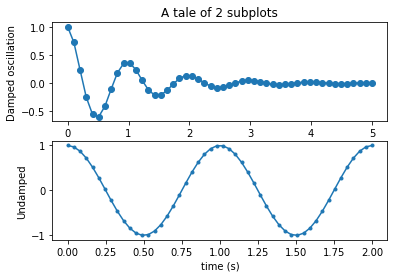

In [12]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## Histogram
Matplotlib can also be used to plot histograms of data:

In [13]:
np.random.seed(19680801)
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

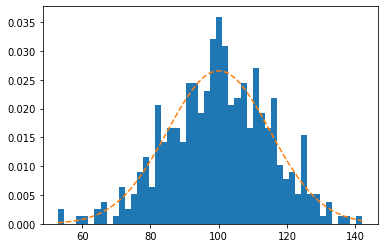

In [14]:
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
plt.show()

## Error Bars
You should include error bars when showing mean data from multiple samples.
This could include survey results or results of multiple runs of an experiment.
This shows how consistent or spread out your results are.

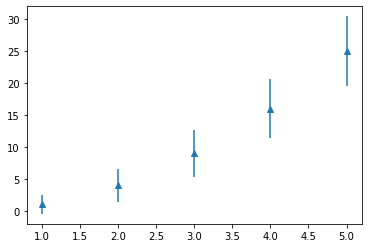

In [15]:
x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

# Very Brief Intro to Probability Theory

How likely is an event to occur?

## Coin Flip Example

<img width=300 src="http://www.irishcoinage.com/JPEGS/K00004X4.JPG"/>


If we flip this (unbiased) coin once, how likely is it that we get heads (stag) or tails (harp)?

Intuitively, we would expect it to be heads about half the time we flip it.

In probability theory, we assign the likelihood of an event happening a number between 0 and 1.
This is known as the "probability" of the event occuring.

We can express the probability of the coin ending up on tails ($p_{tails}$) as:

$P_{tails} = 0.5$

Similarly, we can express the probability of the coin ending up on heads ($p_{heads}$) as:

$P_{heads} = 0.5$

The general formula for the probability of an independent event is :

$P_{event} = \dfrac{(total\: number\: of\: relevant\: outcomes)}{(total\: number\: of\: possible\: outcomes)}$


# Die ExampleðŸŽ²
Using this, can we work out probability of an unbiased die landing on 3?

$total\: number\: of\: relevant\: outcomes= 1$ (a die only has one side which has 3 on it)

$total\: number\: of\: possible\: outcomes = 6$ (a die has six sides)

$P_{three} = 1 / 6$


# Probability Distributions

## Probability Distribution Function (PDF)
This is best illustrated by an example.

Let us look at simulating the rolling of a dice 10000 times using NumPy's [randint](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) function, plotting the number of results on a graph.

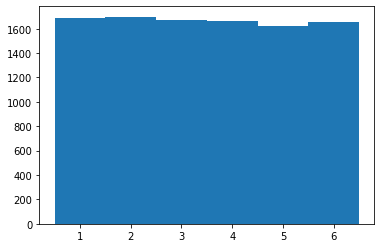

In [16]:
s = np.random.randint(1, high=7, size=10000)  # high is exclusive, so need to give 7
count, bins, ignored = plt.hist(s, bins=6, range=(0.5, 6.5))  # set range so x-axis are in middle of buckets
plt.show()

As we expected, we got a similar number of results for each of the sides. We can also plot this in such a way that the area under the graph sums to one:

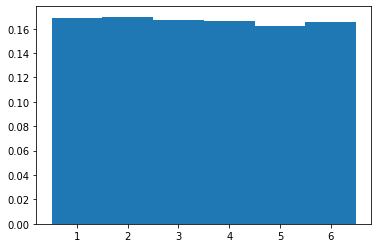

In [17]:
count, bins, ignored = plt.hist(s, bins=6, range=(0.5, 6.5), density=True)  # density=True
plt.show()

This is what is known as a Probability Density Function (PDF). The above PDF represents an example of a probability distribution known as the *uniform* distribution.

There are many kinds of probability distribution, we will talk about some important examples today.



## Normal Distribution
Probably the most important distribution is the *Normal* distribution. Also known as a bell-shaped curve or gaussian distribution.

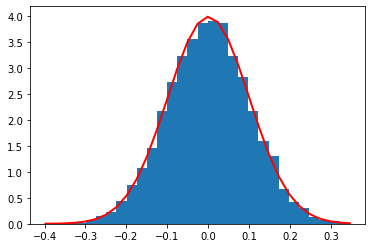

In [18]:
mean, std = 0, 0.1 # mean and standard deviation
s = np.random.normal(mean, std, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

You can see the simulated events in blue, and the ideal normal distribution in red.

## Poisson Distribution
The Poisson distribution may be useful to model events such as:
 - The number of meteorites greater than 1 meter diameter that strike Earth in a year
 - The number of patients arriving in an emergency room between 10 and 11 pm
 - The number of laser photons hitting a detector in a particular time interval

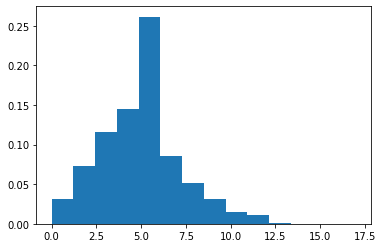

In [19]:
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

## Mean
The "average" value.

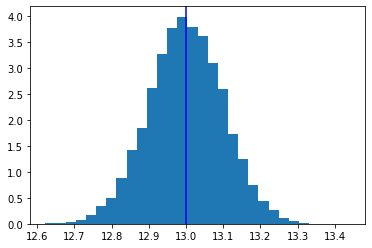

In [20]:
mean, sigma = 13, 0.1 # mean and standard deviation
s = np.random.normal(mean, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.axvline(x=mean, color='b')

plt.show()

## Standard Deviation
Basically, how spread out your data is.

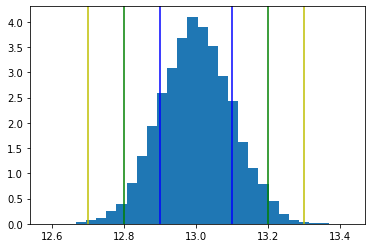

In [21]:
mean, sigma = 13, 0.1 # mean and standard deviation
s = np.random.normal(mean, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.axvline(x=mean+s.std(), color='b')
plt.axvline(x=mean-s.std(), color='b')
plt.axvline(x=mean+s.std() * 2, color='g')
plt.axvline(x=mean-s.std() * 2, color='g')
plt.axvline(x=mean+s.std() * 3, color='y')
plt.axvline(x=mean-s.std() * 3, color='y')
plt.show()

## Median

The 50th percentile of the distribution. 50% of results are below and above this point.

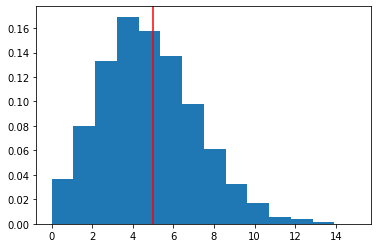

In [22]:
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)

plt.axvline(x=np.median(s), color='r')

plt.show()

## Percentile
You can also get arbitrary percentiles. This is useful in certain scenarios where you want to ensure a Quality of Service (QoS). An example might be that an online service guarantees of uptime of 99%.

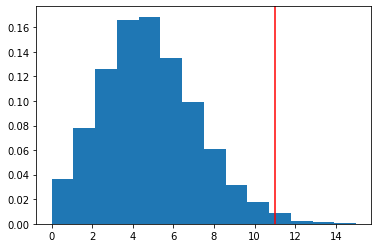

In [23]:
percentile = 99
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)

plt.axvline(x=np.percentile(s, percentile), color='r')

plt.show()

## Mode
The mode of the set of data values that appear most often

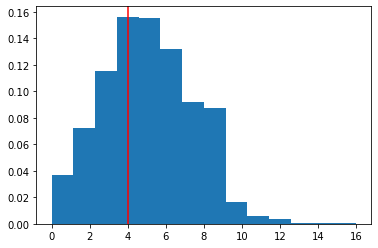

In [24]:
from scipy import stats
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)

plt.axvline(x=stats.mode(s)[0], color='r')

plt.show()

## Further Info
 - NumPy tutorial: https://docs.scipy.org/doc/numpy/user/quickstart.html
 - Matplotlib tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html
 - Dice probabilities: http://www.gwydir.demon.co.uk/jo/probability/calcdice.htm